In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
import warnings
warnings.filterwarnings(action='ignore')

In [2]:
pd.set_option('display.max_columns', None)  

In [3]:
df = pd.read_csv('loan_data.csv')

In [27]:
df

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0           100002       1         Cash loans           M            N   
1           100003       0         Cash loans           F            N   
2           100004       0    Revolving loans           M            Y   
3           100006       0         Cash loans           F            N   
4           100007       0         Cash loans           M            N   
...            ...     ...                ...         ...          ...   
307506      456251       0         Cash loans           M            N   
307507      456252       0         Cash loans           F            N   
307508      456253       0         Cash loans           F            N   
307509      456254       1         Cash loans           F            N   
307510      456255       0         Cash loans           F            N   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
0                    Y             0          202500.0    406597.5   
1                    N             0          270000.0   1293502.5   
2                    Y             0           67500.0    135000.0   
3                    Y             0          135000.0    312682.5   
4                    Y             0          121500.0    513000.0   
...                ...           ...               ...         ...   
307506               N             0          157500.0    254700.0   
307507               Y             0           72000.0    269550.0   
307508               Y             0          153000.0    677664.0   
307509               Y             0          171000.0    370107.0   
307510               N             0          157500.0    675000.0   

        AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE      NAME_INCOME_TYPE  \
0           24700.5         351000.0   Unaccompanied               Working   
1           35698.5        1129500.0          Family         State servant   
2            6750.0         135000.0   Unaccompanied               Working   
3           29686.5         297000.0   Unaccompanied               Working   
4           21865.5         513000.0   Unaccompanied               Working   
...             ...              ...             ...                   ...   
307506      27558.0         225000.0   Unaccompanied               Working   
307507      12001.5         225000.0   Unaccompanied             Pensioner   
307508      29979.0         585000.0   Unaccompanied               Working   
307509      20205.0         319500.0   Unaccompanied  Commercial associate   
307510      49117.5         675000.0   Unaccompanied  Commercial associate   

                  NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  \
0       Secondary / secondary special  Single / not married   
1                    Higher education               Married   
2       Secondary / secondary special  Single / not married   
3       Secondary / secondary special        Civil marriage   
4       Secondary / secondary special  Single / not married   
...                               ...                   ...   
307506  Secondary / secondary special             Separated   
307507  Secondary / secondary special                 Widow   
307508               Higher education             Separated   
307509  Secondary / secondary special               Married   
307510               Higher education               Married   

        NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  \
0       House / apartment                    0.018801       -9461   
1       House / apartment                    0.003541      -16765   
2       House / apartment                    0.010032      -19046   
3       House / apartment                    0.008019      -19005   
4       House / apartment                    0.028663      -19932   
...                   ...                         ...         ...   
307506       With parents                    0.032561       -9327   
307507  House / apartment       

In [18]:
df.shape

(307511, 122)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [90]:
df.isnull().sum()

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
Length: 122, dtype: int64

In [82]:
df_v1 =  df.copy()
df.replace('unknown', np.nan, inplace= True)

In [83]:
df.describe()

SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  307511.000000  307511.000000  307511.000000      3.075110e+05   
mean   278180.518577       0.080729       0.417052      1.687979e+05   
std    102790.175348       0.272419       0.722121      2.371231e+05   
min    100002.000000       0.000000       0.000000      2.565000e+04   
25%    189145.500000       0.000000       0.000000      1.125000e+05   
50%    278202.000000       0.000000       0.000000      1.471500e+05   
75%    367142.500000       0.000000       1.000000      2.025000e+05   
max    456255.000000       1.000000      19.000000      1.170000e+08   

         AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
count  3.075110e+05  307499.000000     3.072330e+05   
mean   5.990260e+05   27108.573909     5.383962e+05   
std    4.024908e+05   14493.737315     3.694465e+05   
min    4.500000e+04    1615.500000     4.050000e+04   
25%    2.700000e+05   16524.000000     2.385000e+05   
50%    5.135310e+05   24903.000000     4.500000e+05   
75%    8.086500e+05   34596.000000     6.795000e+05   
max    4.050000e+06  258025.500000     4.050000e+06   

       REGION_POPULATION_RELATIVE     DAYS_BIRTH  DAYS_EMPLOYED  \
count               307511.000000  307511.000000  307511.000000   
mean                     0.020868  -16036.995067   63815.045904   
std                      0.013831    4363.988632  141275.766519   
min                      0.000290  -25229.000000  -17912.000000   
25%                      0.010006  -19682.000000   -2760.000000   
50%                      0.018850  -15750.000000   -1213.000000   
75%                      0.028663  -12413.000000    -289.000000   
max                      0.072508   -7489.000000  365243.000000   

       DAYS_REGISTRATION  DAYS_ID_PUBLISH    OWN_CAR_AGE     FLAG_MOBIL  \
count      307511.000000    307511.000000  104582.000000  307511.000000   
mean        -4986.120328     -2994.202373      12.061091       0.999997   
std          3522.886321      1509.450419      11.944812       0.001803   
min        -24672.000000     -7197.000000       0.000000       0.000000   
25%         -7479.500000     -4299.000000       5.000000       1.000000   
50%         -4504.000000     -3254.000000       9.000000       1.000000   
75%         -2010.000000     -1720.000000      15.000000       1.000000   
max             0.000000         0.000000      91.000000       1.000000   

       FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE     FLAG_PHONE  \
count   307511.000000    307511.000000     307511.000000  307511.000000   
mean         0.819889         0.199368          0.998133       0.281066   
std          0.384280         0.399526          0.043164       0.449521   
min          0.000000         0.000000          0.000000       0.000000   
25%          1.000000         0.000000          1.000000       0.000000   
50%          1.000000         0.000000          1.000000       0.000000   
75%          1.000000         0.000000          1.000000       1.000000   
max          1.000000         1.000000          1.000000       1.000000   

          FLAG_EMAIL  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
count  307511.000000    307509.000000         307511.000000   
mean        0.056720         2.152665              2.052463   
std         0.231307         0.910682              0.509034   
min         0.000000         1.000000              1.000000   
25%         0.000000         2.000000              2.000000   
50%         0.000000         2.000000              2.000000   
75%         0.000000         3.000000              2.000000   
max         1.000000        20.000000              3.000000   

       REGION_RATING_CLIENT_W_CITY  HOUR_APPR_PROCESS_START  \
count                307511.000000            307511.000000   
mean                      2.031521                12.063419   
std                       0.502737                 3.265832   
min                       1.000000                 0.000000   
25%                       

In [47]:
df.sample(5)

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
133310      254614       0         Cash loans           F            Y   
83759       197141       0         Cash loans           F            Y   
172344      299713       0         Cash loans           F            N   
303318      451424       0         Cash loans           F            Y   
71999       183499       0         Cash loans           F            N   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
133310               N             1          166500.0    621621.0   
83759                Y             1          109899.0    389844.0   
172344               N             0           67500.0    225000.0   
303318               Y             0           94500.0    490500.0   
71999                N             0          180000.0   1125000.0   

       AMT_ANNUITY AMT_GOODS_PRICE NAME_TYPE_SUITE      NAME_INCOME_TYPE  \
133310     34839.0        576000.0          Family               Working   
83759      16866.0        315000.0   Unaccompanied  Commercial associate   
172344     17775.0        225000.0   Unaccompanied               Working   
303318     14341.5        490500.0   Unaccompanied             Pensioner   
71999      47794.5       1125000.0   Unaccompanied               Working   

                  NAME_EDUCATION_TYPE NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
133310  Secondary / secondary special            Married  House / apartment   
83759   Secondary / secondary special            Married  House / apartment   
172344                Lower secondary     Civil marriage   Rented apartment   
303318  Secondary / secondary special              Widow  House / apartment   
71999   Secondary / secondary special            Married  House / apartment   

        REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  \
133310                    0.011703      -10654          -1965   
83759                     0.030755       -9222           -535   
172344                    0.022625      -16740           -654   
303318                    0.031329      -23561         365243   
71999                     0.003069      -18113          -1261   

        DAYS_REGISTRATION  DAYS_ID_PUBLISH OWN_CAR_AGE  FLAG_MOBIL  \
133310            -7677.0            -3262         5.0           1   
83759             -1761.0             -881         7.0           1   
172344            -9063.0             -285     unknown           1   
303318            -7182.0            -4569         4.0           1   
71999            -11157.0            -1249     unknown           1   

        FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  \
133310               1                0                 1           0   
83759                1                1                 1           1   
172344               1                1                 1           0   
303318               0                0                 1           1   
71999                1                0                 1           0   

        FLAG_EMAIL     OCCUPATION_TYPE CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
133310           0         Sales staff             3.0                     2   
83759            0         Sales staff             3.0                     2   
172344           0  Low-skill Laborers             2.0                     2   
303318           0             unknown             1.0                     2   
71999            0            Laborers             2.0                     3   

        REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  \
133310                            2                  WEDNESDAY   
83759                             2                     MONDAY   
172344                            2                     MONDAY   
303318                            2                  WEDNESDAY   
71999                             3                     MONDAY   

        HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
133310            

In [84]:
df.AMT_REQ_CREDIT_BUREAU_HOUR.value_counts()

0.0    264366
1.0      1560
2.0        56
3.0         9
4.0         1
Name: AMT_REQ_CREDIT_BUREAU_HOUR, dtype: int64

In [80]:
df_v1.AMT_REQ_CREDIT_BUREAU_HOUR.isnull().sum()

41519

In [68]:
df.YEARS_BUILD_AVG.dt

dtype('O')

In [48]:
df.OCCUPATION_TYPE.value_counts()

unknown                  96391
Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: OCCUPATION_TYPE, dtype: int64

In [46]:
df['DAYS_BIRTH']=df['DAYS_BIRTH']*-1

In [44]:
df.DAYS_BIRTH//365

0         25
1         45
2         52
3         52
4         54
          ..
307506    25
307507    56
307508    41
307509    32
307510    46
Name: DAYS_BIRTH, Length: 307511, dtype: int64

In [32]:
df.NAME_CONTRACT_TYPE.value_counts()

Cash loans         278232
Revolving loans     29279
Name: NAME_CONTRACT_TYPE, dtype: int64

In [98]:
df.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)

In [91]:
#data preprocessing

In [92]:
df.sample(5)

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
60241       169851       0         Cash loans           F            N   
277707      421752       1         Cash loans           M            Y   
157013      281992       0         Cash loans           F            N   
209389      342680       0         Cash loans           M            Y   
191562      322119       0    Revolving loans           F            N   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
60241                Y             0          337500.0   1233000.0   
277707               Y             0          180000.0   1525405.5   
157013               Y             0          135000.0    785398.5   
209389               Y             1          225000.0   1078200.0   
191562               Y             2           67500.0    180000.0   

        AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
60241       36049.5        1233000.0   Unaccompanied          Working   
277707      44730.0        1332000.0   Unaccompanied        Pensioner   
157013      35622.0         702000.0          Family          Working   
209389      31653.0         900000.0   Unaccompanied          Working   
191562       9000.0         180000.0          Family          Working   

                  NAME_EDUCATION_TYPE NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
60241                Higher education            Married  House / apartment   
277707                Lower secondary            Married  House / apartment   
157013               Higher education            Married  House / apartment   
209389  Secondary / secondary special            Married  House / apartment   
191562  Secondary / secondary special            Married  House / apartment   

        REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  \
60241                     0.010966      -12058          -5369   
277707                    0.019689      -21789         365243   
157013                    0.024610      -10168          -1046   
209389                    0.030755      -14735          -2479   
191562                    0.018209      -13452           -124   

        DAYS_REGISTRATION  DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  \
60241             -1740.0            -2278          NaN           1   
277707            -4959.0            -4959          7.0           1   
157013            -4456.0            -1506          NaN           1   
209389            -7304.0            -4253          9.0           1   
191562            -6213.0            -4491          NaN           1   

        FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  \
60241                1                1                 1           1   
277707               0                0                 1           0   
157013               1                0                 1           1   
209389               1                0                 1           0   
191562               1                0                 1           0   

        FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
60241            0     Accountants              2.0                     2   
277707           0             NaN              2.0                     2   
157013           0     Sales staff              2.0                     2   
209389           0         Drivers              3.0                     2   
191562           0     Sales staff              4.0                     3   

        REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  \
60241                             2                   SATURDAY   
277707                            2                   THURSDAY   
157013                            2                   SATURDAY   
209389                            2                     FRIDAY   
191562                            3                     SUNDAY   

        HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
60241                        15                 

In [100]:
for index,i in enumerate(df.columns):
    print(index,' : ',i)

0  :  SK_ID_CURR
1  :  TARGET
2  :  NAME_CONTRACT_TYPE
3  :  CODE_GENDER
4  :  FLAG_OWN_CAR
5  :  FLAG_OWN_REALTY
6  :  CNT_CHILDREN
7  :  AMT_INCOME_TOTAL
8  :  AMT_CREDIT
9  :  AMT_ANNUITY
10  :  AMT_GOODS_PRICE
11  :  NAME_TYPE_SUITE
12  :  NAME_INCOME_TYPE
13  :  NAME_EDUCATION_TYPE
14  :  NAME_FAMILY_STATUS
15  :  NAME_HOUSING_TYPE
16  :  REGION_POPULATION_RELATIVE
17  :  DAYS_BIRTH
18  :  DAYS_EMPLOYED
19  :  DAYS_REGISTRATION
20  :  DAYS_ID_PUBLISH
21  :  OWN_CAR_AGE
22  :  FLAG_MOBIL
23  :  FLAG_EMP_PHONE
24  :  FLAG_WORK_PHONE
25  :  FLAG_CONT_MOBILE
26  :  FLAG_PHONE
27  :  FLAG_EMAIL
28  :  OCCUPATION_TYPE
29  :  CNT_FAM_MEMBERS
30  :  REGION_RATING_CLIENT
31  :  REGION_RATING_CLIENT_W_CITY
32  :  WEEKDAY_APPR_PROCESS_START
33  :  HOUR_APPR_PROCESS_START
34  :  REG_REGION_NOT_LIVE_REGION
35  :  REG_REGION_NOT_WORK_REGION
36  :  LIVE_REGION_NOT_WORK_REGION
37  :  REG_CITY_NOT_LIVE_CITY
38  :  REG_CITY_NOT_WORK_CITY
39  :  LIVE_CITY_NOT_WORK_CITY
40  :  ORGANIZATION_TYPE
41  :

In [120]:
df.iloc[:,:60].isnull().mean()*100

SK_ID_CURR                      0.000000
TARGET                          0.000000
NAME_CONTRACT_TYPE              0.000000
CODE_GENDER                     0.000000
FLAG_OWN_CAR                    0.000000
FLAG_OWN_REALTY                 0.000000
CNT_CHILDREN                    0.000000
AMT_INCOME_TOTAL                0.000000
AMT_CREDIT                      0.000000
AMT_ANNUITY                     0.003902
AMT_GOODS_PRICE                 0.090403
NAME_TYPE_SUITE                 0.420148
NAME_INCOME_TYPE                0.000000
NAME_EDUCATION_TYPE             0.000000
NAME_FAMILY_STATUS              0.000000
NAME_HOUSING_TYPE               0.000000
REGION_POPULATION_RELATIVE      0.000000
DAYS_BIRTH                      0.000000
DAYS_EMPLOYED                   0.000000
DAYS_REGISTRATION               0.000000
DAYS_ID_PUBLISH                 0.000000
OWN_CAR_AGE                    65.990810
FLAG_MOBIL                      0.000000
FLAG_EMP_PHONE                  0.000000
FLAG_WORK_PHONE 

In [126]:
df.iloc[:,60:120].isnull().mean()*100

YEARS_BEGINEXPLUATATION_MODE    48.781019
YEARS_BUILD_MODE                66.497784
COMMONAREA_MODE                 69.872297
ELEVATORS_MODE                  53.295980
ENTRANCES_MODE                  50.348768
FLOORSMAX_MODE                  49.760822
FLOORSMIN_MODE                  67.848630
LANDAREA_MODE                   59.376738
LIVINGAPARTMENTS_MODE           68.354953
LIVINGAREA_MODE                 50.193326
NONLIVINGAPARTMENTS_MODE        69.432963
NONLIVINGAREA_MODE              55.179164
APARTMENTS_MEDI                 50.749729
BASEMENTAREA_MEDI               58.515956
YEARS_BEGINEXPLUATATION_MEDI    48.781019
YEARS_BUILD_MEDI                66.497784
COMMONAREA_MEDI                 69.872297
ELEVATORS_MEDI                  53.295980
ENTRANCES_MEDI                  50.348768
FLOORSMAX_MEDI                  49.760822
FLOORSMIN_MEDI                  67.848630
LANDAREA_MEDI                   59.376738
LIVINGAPARTMENTS_MEDI           68.354953
LIVINGAREA_MEDI                 50

In [127]:
df.iloc[:,120:].isnull().mean()*100

AMT_REQ_CREDIT_BUREAU_QRT     13.501631
AMT_REQ_CREDIT_BUREAU_YEAR    13.501631
dtype: float64

In [ ]:
# Replacing null OCCUPATION_TYPE with mode value

In [167]:
df['OCCUPATION_TYPE'] = df['OCCUPATION_TYPE'].fillna(df.OCCUPATION_TYPE.mode().iloc[0])

In [168]:
df.OCCUPATION_TYPE.isnull().sum()

0

In [157]:
# df[df.OCCUPATION_TYPE.isnull()]

In [129]:
df.OCCUPATION_TYPE.replace(np.nan, 'unknown').value_counts()

unknown                  96391
Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: OCCUPATION_TYPE, dtype: int64

In [131]:
df[df.OCCUPATION_TYPE.isnull()].NAME_INCOME_TYPE.value_counts()

Pensioner               55357
Working                 24920
Commercial associate    12297
State servant            3787
Unemployed                 22
Student                     5
Businessman                 2
Maternity leave             1
Name: NAME_INCOME_TYPE, dtype: int64

In [132]:
df[df.OCCUPATION_TYPE.isnull()].NAME_EDUCATION_TYPE.value_counts()

Secondary / secondary special    71335
Higher education                 20726
Incomplete higher                 2366
Lower secondary                   1907
Academic degree                     57
Name: NAME_EDUCATION_TYPE, dtype: int64

In [148]:
df.groupby('NAME_INCOME_TYPE')['OCCUPATION_TYPE'].apply(lambda x: x.mode().iloc[0] if not x.mode().empty else None)

NAME_INCOME_TYPE
Businessman                   Managers
Commercial associate          Laborers
Maternity leave             Core staff
Pensioner               Cleaning staff
State servant               Core staff
Student                       Laborers
Unemployed                        None
Working                       Laborers
Name: OCCUPATION_TYPE, dtype: object

In [144]:
df.groupby('NAME_EDUCATION_TYPE')['OCCUPATION_TYPE'].apply(lambda x: x.mode().iloc[0])

NAME_EDUCATION_TYPE
Academic degree                    Managers
Higher education                 Core staff
Incomplete higher                  Laborers
Lower secondary                    Laborers
Secondary / secondary special      Laborers
Name: OCCUPATION_TYPE, dtype: object

In [153]:
df[df.NAME_INCOME_TYPE=='Pensioner'].OCCUPATION_TYPE.value_counts()

Cleaning staff    2
Laborers          1
Medicine staff    1
Sales staff       1
Name: OCCUPATION_TYPE, dtype: int64

In [154]:
df[df.NAME_EDUCATION_TYPE=='Secondary / secondary special'].OCCUPATION_TYPE.value_counts()

Laborers                 46282
Sales staff              24835
Drivers                  15808
Core staff               12643
Managers                  8847
Medicine staff            7315
High skill tech staff     6106
Security staff            5643
Cooking staff             5336
Cleaning staff            4244
Accountants               3544
Private service staff     2006
Low-skill Laborers        1889
Waiters/barmen staff      1058
Secretaries                724
Realty agents              474
HR staff                   170
IT staff                   132
Name: OCCUPATION_TYPE, dtype: int64

In [187]:
df.columns[0]

'SK_ID_CURR'

44


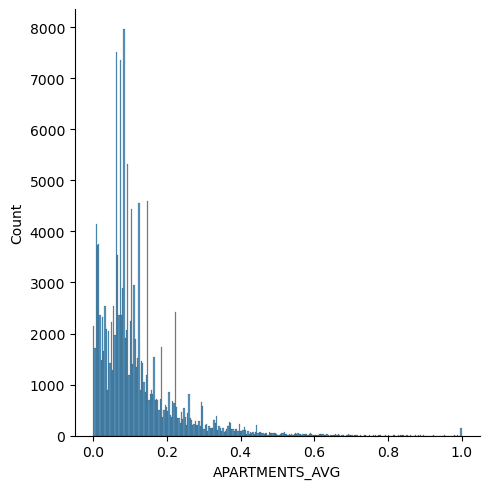

45


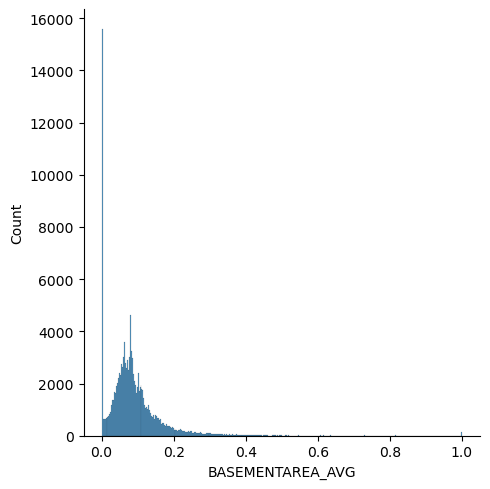

46


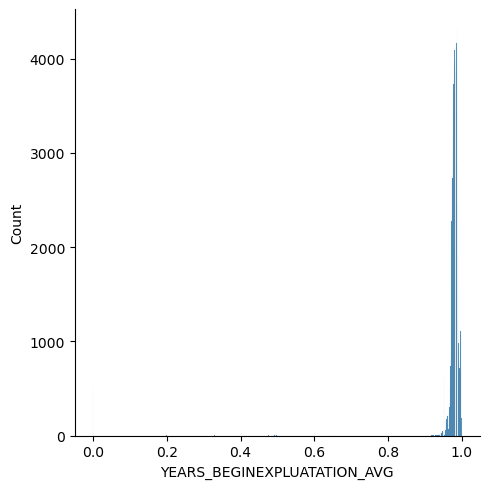

47


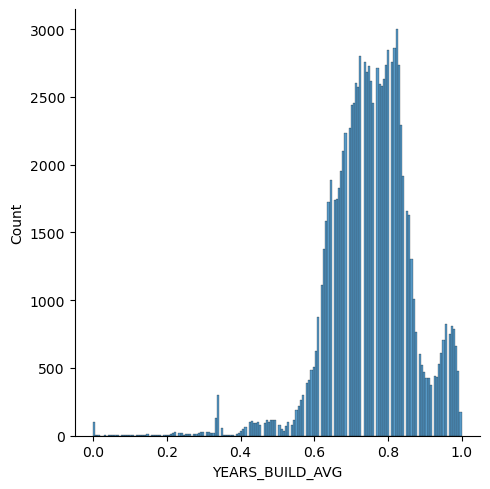

48


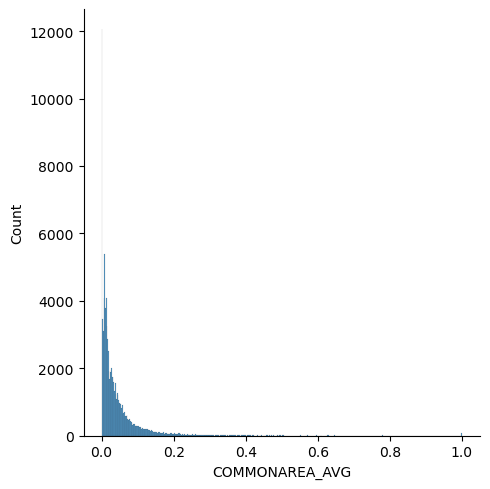

49


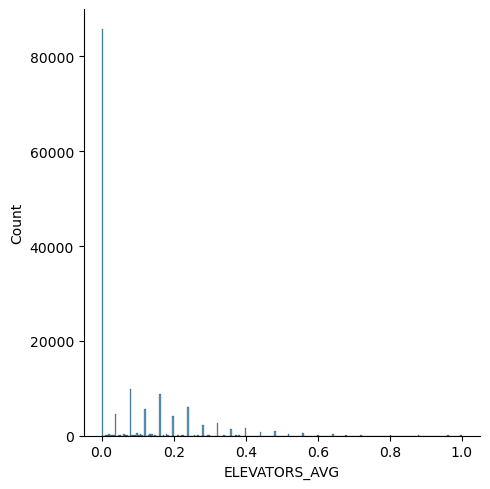

50


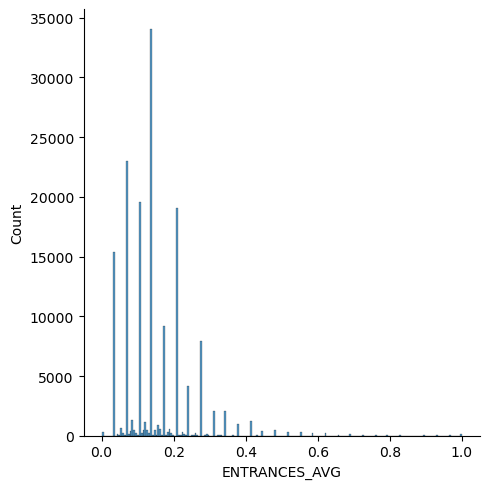

51


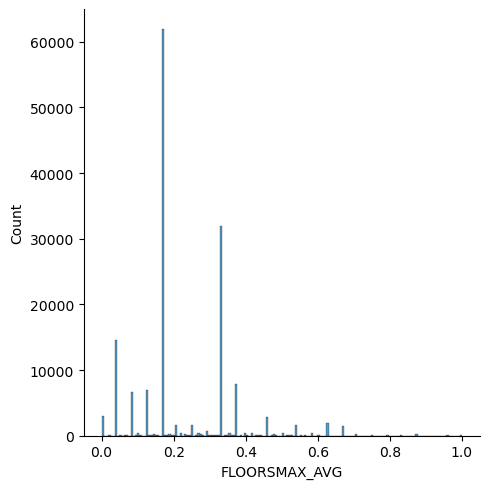

52


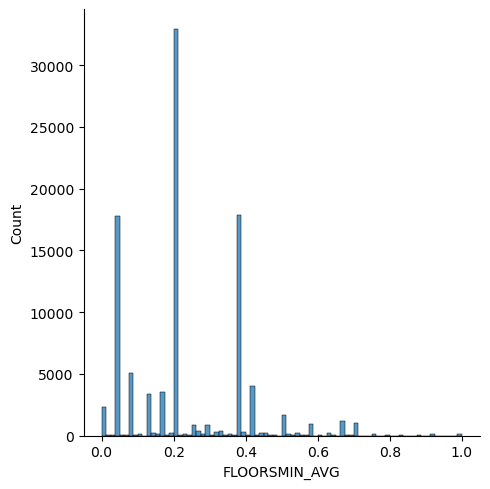

53


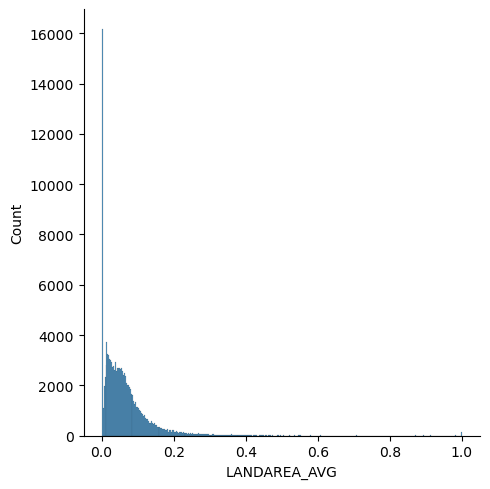

54


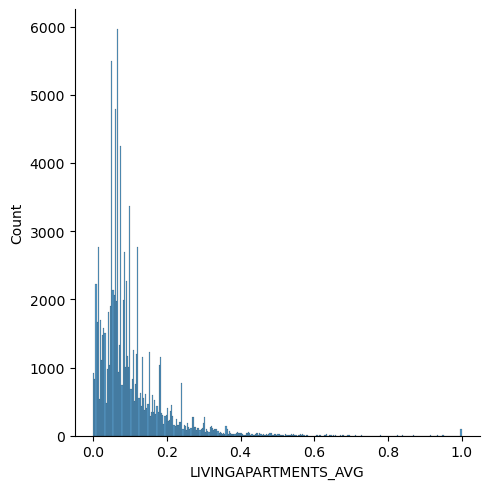

55


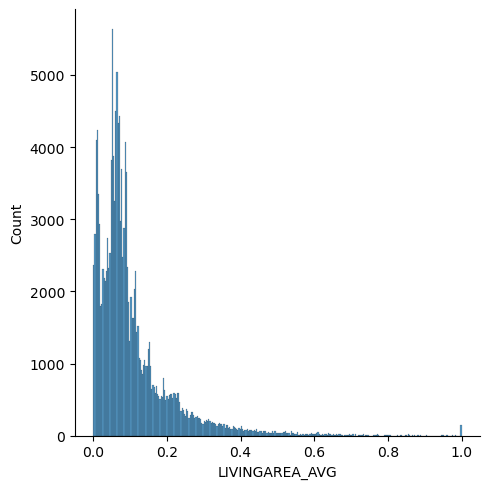

56


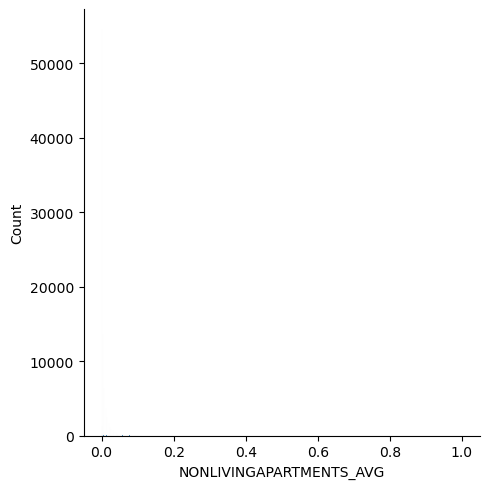

57


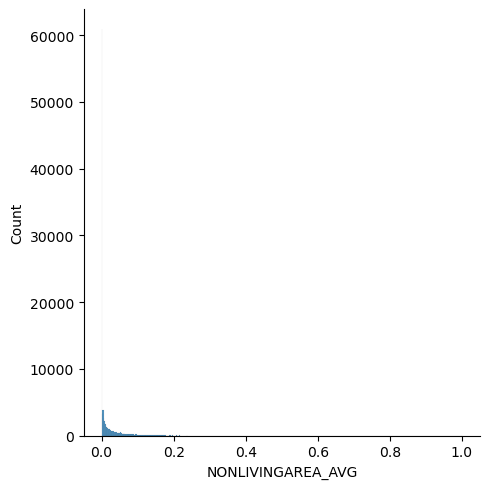

In [190]:
for i in range(44,58):
    print(i)
    sns.displot(df[df.columns[i]])
    plt.show()

In [197]:
for i in range(44,58):
    df[df.columns[i]] = df[df.columns[i]].fillna(df[df.columns[i]].mean())

In [198]:
for i in range(116,122):
    df[df.columns[i]] = df[df.columns[i]].fillna(df[df.columns[i]].mode().iloc[0])

122

In [201]:
print('percentage null records')
for i in range(df.shape[1]):
    per_null=df.iloc[:,i].isnull().mean()*100
    col = df.columns[i-1]
    print(i-1,' : ', col,' : ',  per_null)



percentage null records
-1  :  AMT_REQ_CREDIT_BUREAU_YEAR  :  0.0
0  :  SK_ID_CURR  :  0.0
1  :  TARGET  :  0.0
2  :  NAME_CONTRACT_TYPE  :  0.0
3  :  CODE_GENDER  :  0.0
4  :  FLAG_OWN_CAR  :  0.0
5  :  FLAG_OWN_REALTY  :  0.0
6  :  CNT_CHILDREN  :  0.0
7  :  AMT_INCOME_TOTAL  :  0.0
8  :  AMT_CREDIT  :  0.003902299429939092
9  :  AMT_ANNUITY  :  0.09040327012692229
10  :  AMT_GOODS_PRICE  :  0.42014757195677555
11  :  NAME_TYPE_SUITE  :  0.0
12  :  NAME_INCOME_TYPE  :  0.0
13  :  NAME_EDUCATION_TYPE  :  0.0
14  :  NAME_FAMILY_STATUS  :  0.0
15  :  NAME_HOUSING_TYPE  :  0.0
16  :  REGION_POPULATION_RELATIVE  :  0.0
17  :  DAYS_BIRTH  :  0.0
18  :  DAYS_EMPLOYED  :  0.0
19  :  DAYS_REGISTRATION  :  0.0
20  :  DAYS_ID_PUBLISH  :  65.9908100848425
21  :  OWN_CAR_AGE  :  0.0
22  :  FLAG_MOBIL  :  0.0
23  :  FLAG_EMP_PHONE  :  0.0
24  :  FLAG_WORK_PHONE  :  0.0
25  :  FLAG_CONT_MOBILE  :  0.0
26  :  FLAG_PHONE  :  0.0
27  :  FLAG_EMAIL  :  0.0
28  :  OCCUPATION_TYPE  :  0.00065038323832318

In [178]:
df.APARTMENTS_AVG.isnull().sum()

156061

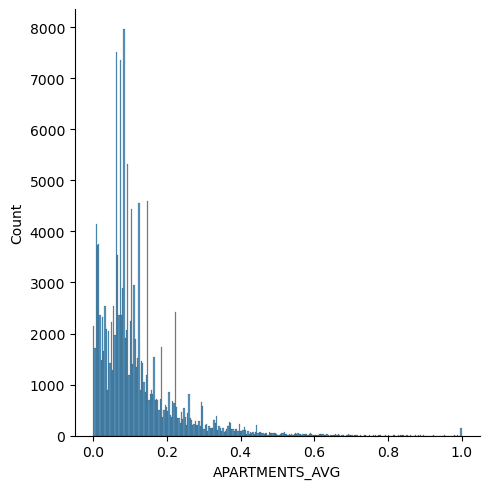

In [173]:
sns.displot(df.APARTMENTS_AVG)
plt.show()

In [183]:
df[df.APARTMENTS_AVG.isnull()].APARTMENTS_MEDI.notnull()

2         False
3         False
4         False
5         False
6         False
          ...  
307497    False
307499    False
307502    False
307503    False
307504    False
Name: APARTMENTS_MEDI, Length: 156061, dtype: bool

In [182]:
df.APARTMENTS_AVG

0         0.0247
1         0.0959
2            NaN
3            NaN
4            NaN
           ...  
307506    0.2021
307507    0.0247
307508    0.1031
307509    0.0124
307510    0.0742
Name: APARTMENTS_AVG, Length: 307511, dtype: float64

In [180]:
df[df.APARTMENTS_AVG.isnull()].APARTMENTS_MODE      

2        NaN
3        NaN
4        NaN
5        NaN
6        NaN
          ..
307497   NaN
307499   NaN
307502   NaN
307503   NaN
307504   NaN
Name: APARTMENTS_MODE, Length: 156061, dtype: float64

In [152]:
# df.groupby('NAME_INCOME_TYPE')['AMT_INCOME_TOTAL'].mean()

In [151]:
# df.groupby('NAME_EDUCATION_TYPE')['AMT_INCOME_TOTAL'].mean()

In [103]:
# columns_to_drop = [0,22-27,32-39,41,43,58-90,95-115]
col_ph_email_flg = list(range(22,28)) # is phone, email flag
col_processing_address = list(range(32,40)) #application processing time, address check
col_specific = [0,21,41,43] # SK_ID, Car Age, ext source 1 and 3 contains more nulls
col_build_char = list(range(58,91)) # building specific column (median, mode)
col_phone_doc = list(range(95,116)) # documents flag_2 to 21
columns_to_drop = col_ph_email_flg + col_processing_address + col_build_char + col_phone_doc + col_specific


FLAG_MOBIL, FLAG_EMP_PHONE, FLAG_WORK_PHONE, FLAG_CONT_MOBILE
,FLAG_PHONE,FLAG_EMAIL,  
WEEKDAY_APPR_PROCESS_START,
HOUR_APPR_PROCESS_START,
REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,
REG_CITY_NOT_LIVE_CITY, REG_CITY_NOT_WORK_CITY, LIVE_CITY_NOT_WORK_CITY,

EXT_SOURCE_1,EXT_SOURCE_3,
DAYS_LAST_PHONE_CHANGE,
FLAG_DOCUMENT_2 to FLAG_DOCUMENT_21